<a href="https://colab.research.google.com/github/connorgrannis/nch_python_workshop/blob/master/Practice_Assignments/Week_4_solutions/Week_4_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise #1

In [0]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')


(864, 12)
(861, 12)


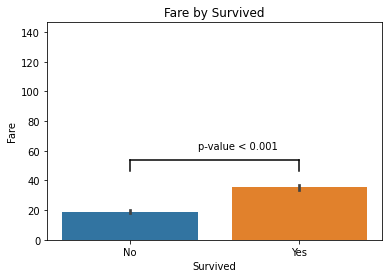

In [17]:
# drop the three highest fares from above
print(titanic.shape)
rowstodrop = list(titanic.nlargest(3, 'Fare').index)
for row in rowstodrop:
  titanic.drop(row, inplace=True)
print(titanic.shape)

# put it all together
# empty lists to store the heights and centers of both graphs
heights = []
centers = []

# to save keystrokes and minimize room for error
x = 'Survived'
y = 'Fare'

# create figure
plt.figure()
splot = sns.barplot(x=x, y=y, data=titanic, ci=68)
plt.xticks(ticks=range(2), labels=["No", "Yes"])

# setting the upper range of the y-axis so we'll have room for brackets
plt.ylim(top=titanic[y].max())

# use "patches" to get attributes of each bar
for p in splot.patches:
  heights.append(p.get_height())
  # get the x-coordinate of where the bar starts and add half of the width to get the center
  centers.append(p.get_x() + p.get_width() /2.) # using 2. instead of 2 to make it a float
  
# set the bracket height of an eighth of the above the 
lineheight = np.array(heights).max() + titanic[y].max()/8

# create brackets out of two vertical lines, and one horizontal line
plt.plot([centers[0], centers[0]], [lineheight-titanic[y].max()/20, lineheight], c='k')      # first tick
plt.plot([centers[0], centers[1]], [lineheight, lineheight], c='k')        # line
plt.plot([centers[1], centers[1]], [lineheight-titanic[y].max()/20, lineheight], c='k')      # end tick

# t-test to see if there are significant fare differences between survivors and non-survivors
survived = titanic['Survived'] == 1
died = titanic['Survived'] == 0
t, p = stats.ttest_ind(titanic[survived]['Fare'], titanic[died]['Fare'], nan_policy='omit')

# conditionally writing the p-value
if p < 0.001:
  p = 0.001
  plt.annotate(f"p-value < {p}", (.4, lineheight+titanic[y].max()/20))
else:
  plt.annotate(f"p-value = {np.round(p, 3)}", (.4, lineheight+titanic[y].max()/20))

# add title
plt.title(f'{y} by {x}')

# display plot
plt.show()

# Exercise #2

In [0]:
import os, sys, re    # `re` is a package that uses regex (regular expressions). We won't go into this too much, 
# but it's an efficient way to search for strings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the dataset
movies = pd.read_csv('https://raw.githubusercontent.com/harshitcodes/tmdb_movie_data_analysis/master/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')

In [0]:
genres = []   # empty list that we'll populate with the extracted values
for row in range(len(movies['genres'])):
  genre_start = [m.start()+8 for m in re.finditer('"name"', movies.genres[row])]    # list comprehension that finds each instance of '"name"' and adds 8 to get to the start of the actual value
  genres.append(', '.join([movies.genres[row][genre_start[i]: movies.genres[row].find('}', genre_start[i])] for i in range(len(genre_start))]))
  # that's a confusing line ^^
  # basically, for each instance of '"name"' we're going to collect the text from 8 characters past '"name"' until the next '}' and add that value to our genres list
  # and we're going to repeat this for each row in the dataframe

In [0]:
production_companies = []
for row in range(len(movies['production_companies'])):
  prod_start = [m.start()+8 for m in re.finditer('"name"', movies.production_companies[row])]
  production_companies.append(', '.join([movies.production_companies[row][prod_start[i]: movies.production_companies[row].find(',', prod_start[i])] for i in range(len(prod_start))]))
  

In [0]:
movies['genres'] = genres
movies['production_companies'] = production_companies
movies['profit'] = movies.revenue - movies.budget

In [23]:
marvel = ['Marvel' in movies.loc[title]['production_companies'] for title in movies.index]
marvel = movies[marvel]
marvel['Company'] = 'Marvel'

dc = ['DC Entertainment' in movies.loc[title]['production_companies'] for title in movies.index]
dc = movies[dc]
dc['Company'] = 'DC'

comics = pd.concat([marvel, dc])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


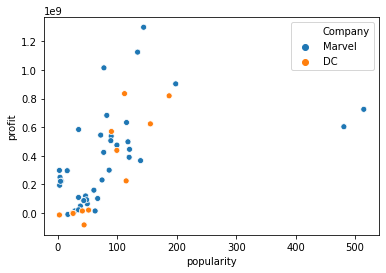

In [24]:
sns.scatterplot(x='popularity', y='profit', data=comics, hue='Company')

In [25]:
 comics.groupby(['title'])['popularity'].max().sort_values()[-2:]

title
Guardians of the Galaxy    481.098624
Deadpool                   514.569956
Name: popularity, dtype: float64

Text(450, 400000000, 'Deadpool')

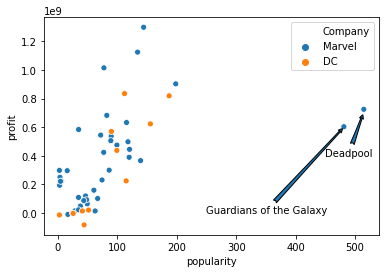

In [26]:
sns.scatterplot(x='popularity', y='profit', data=comics, hue='Company')
plt.annotate(s='Guardians of the Galaxy', xy=(481, 600000000), xytext=(250, .2), arrowprops=dict(arrowstyle='fancy'))
plt.annotate(s='Deadpool', xy=(514, 700000000), xytext=(450, 400000000), arrowprops=dict(arrowstyle='fancy'))

In [27]:
from scipy import stats   # we only need the stats portion of scipy

t, p = stats.ttest_ind(marvel['popularity'], dc['popularity'], nan_policy='omit')
print(f't-stat is: {t}\np-value is: {p}')

t-stat is: 0.34619198688410585
p-value is: 0.7307113641871237


In [28]:
import statsmodels.formula.api as smf
fullfactorial = smf.ols(formula='profit ~ runtime*popularity*C(Company)', data=comics)
# fitting model
results = fullfactorial.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     9.304
Date:                Wed, 13 May 2020   Prob (F-statistic):           6.64e-07
Time:                        17:49:42   Log-Likelihood:                -1027.7
No. Observations:                  50   AIC:                             2071.
Df Residuals:                      42   BIC:                             2087.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [29]:
import statsmodels.formula.api as smf
fullfactorial = smf.ols(formula='profit ~ popularity*C(Company)', data=comics)
# fitting model
results = fullfactorial.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     8.965
Date:                Wed, 13 May 2020   Prob (F-statistic):           8.71e-05
Time:                        17:49:44   Log-Likelihood:                -1039.6
No. Observations:                  50   AIC:                             2087.
Df Residuals:                      46   BIC:                             2095.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 